> cluster之间的两两比较，貌似更能发现重要的marker。

In [1]:
setwd("/data/wangjl/scScripts/")
getwd()

[1] "/data/wangjl/scScripts"

In [2]:
dir.create("backup/c1/") #enrich/

outputRoot=paste0( getwd(), "/backup/c1/") 
outputRoot

Warning message in dir.create("backup/c1/"):
“'backup/c1' already exists”


[1] "/data/wangjl/scScripts/backup/c1/"

In [3]:
##
library(Seurat)
library(monocle)

library(tidyverse)
library(patchwork)

Loading required package: Matrix

Loading required package: Biobase

Loading required package: BiocGenerics

Loading required package: parallel


Attaching package: ‘BiocGenerics’


The following objects are masked from ‘package:parallel’:

    clusterApply, clusterApplyLB, clusterCall, clusterEvalQ,
    clusterExport, clusterMap, parApply, parCapply, parLapply,
    parLapplyLB, parRapply, parSapply, parSapplyLB


The following object is masked from ‘package:Matrix’:

    which


The following objects are masked from ‘package:stats’:

    IQR, mad, sd, var, xtabs


The following objects are masked from ‘package:base’:

    anyDuplicated, append, as.data.frame, basename, cbind, colnames,
    dirname, do.call, duplicated, eval, evalq, Filter, Find, get, grep,
    grepl, intersect, is.unsorted, lapply, Map, mapply, match, mget,
    order, paste, pmax, pmax.int, pmin, pmin.int, Position, rank,
    rbind, Reduce, rownames, sapply, setdiff, sort, table, tapply,
    union, unique, unsplit, wh

# load data

In [4]:
library(clusterProfiler)
library(org.Hs.eg.db)



Registered S3 method overwritten by 'enrichplot':
  method               from
  fortify.enrichResult DOSE

clusterProfiler v3.12.0  For help: https://guangchuangyu.github.io/software/clusterProfiler

If you use clusterProfiler in published research, please cite:
Guangchuang Yu, Li-Gen Wang, Yanyan Han, Qing-Yu He. clusterProfiler: an R package for comparing biological themes among gene clusters. OMICS: A Journal of Integrative Biology. 2012, 16(5):284-287.


Attaching package: ‘clusterProfiler’


The following object is masked from ‘package:purrr’:

    simplify


Loading required package: AnnotationDbi

Loading required package: IRanges

Loading required package: S4Vectors


Attaching package: ‘S4Vectors’


The following objects are masked from ‘package:dplyr’:

    first, rename


The following object is masked from ‘package:tidyr’:

    expand


The following object is masked from ‘package:Matrix’:

    expand


The following object is masked from ‘package:base’:

    expand.grid


## load all

In [5]:
scRNA <- readRDS("backup/a1/pbmc10k_final.rds")
scRNA

An object of class Seurat 
22860 features across 10441 samples within 1 assay 
Active assay: RNA (22860 features)
 3 dimensional reductions calculated: pca, umap, tsne

In [6]:
levels( scRNA@meta.data$seurat_clusters )

[1] "0"  "1"  "2"  "3"  "4"  "5"  "6"  "7"  "8"  "9"  "10" "11" "12" "13" "14"
[16] "15" "16" "17" "18" "19"

Warning message:
“Using `as.character()` on a quosure is deprecated as of rlang 0.3.0.
Please use `as_label()` or `as_name()` instead.
This warning is displayed once per session.”


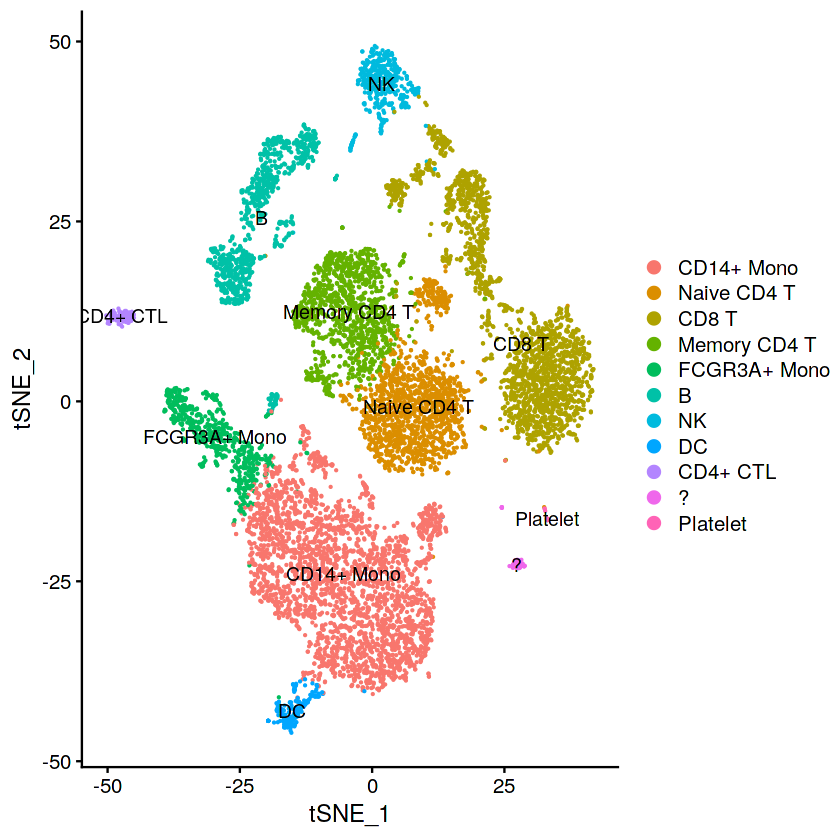

In [7]:
DimPlot(scRNA, reduction = 'tsne', label = TRUE)

## load T sub

In [8]:
scRNAsub <- readRDS("backup/a2/pbmc10k-Tsubset_final.rds")
scRNAsub

An object of class Seurat 
22860 features across 4641 samples within 1 assay 
Active assay: RNA (22860 features)
 3 dimensional reductions calculated: pca, umap, tsne

In [9]:
head(scRNAsub@meta.data)

orig.ident nCount_RNA nFeature_RNA percent.mt RNA_snn_res.0.5
AAACCCAGTCGGTGAA pbmc10k     6590      1867         10.303490  13             
AAACCCATCAGACAAA pbmc10k    11543      2850          6.688036  2              
AAACCCATCCATACTT pbmc10k     6686      2370          9.856416  4              
AAACGAACAACTCGAT pbmc10k     5453      1480         11.424904  2              
AAACGAACACCGAATT pbmc10k    10146      2406          3.617189  1              
AAACGAACAGACACCC pbmc10k     8703      2369          3.171320  3              
                 seurat_clusters cellType     RNA_snn_res.0.9
AAACCCAGTCGGTGAA 9               CD8 T        9              
AAACCCATCAGACAAA 0               CD8 T        0              
AAACCCATCCATACTT 4               CD8 T        4              
AAACGAACAACTCGAT 8               CD8 T        8              
AAACGAACACCGAATT 1               Naive CD4 T  1              
AAACGAACAGACACCC 3               Memory CD4 T 3

In [10]:
levels( scRNAsub@meta.data$seurat_clusters )

[1] "0"  "1"  "2"  "3"  "4"  "5"  "6"  "7"  "8"  "9"  "10"

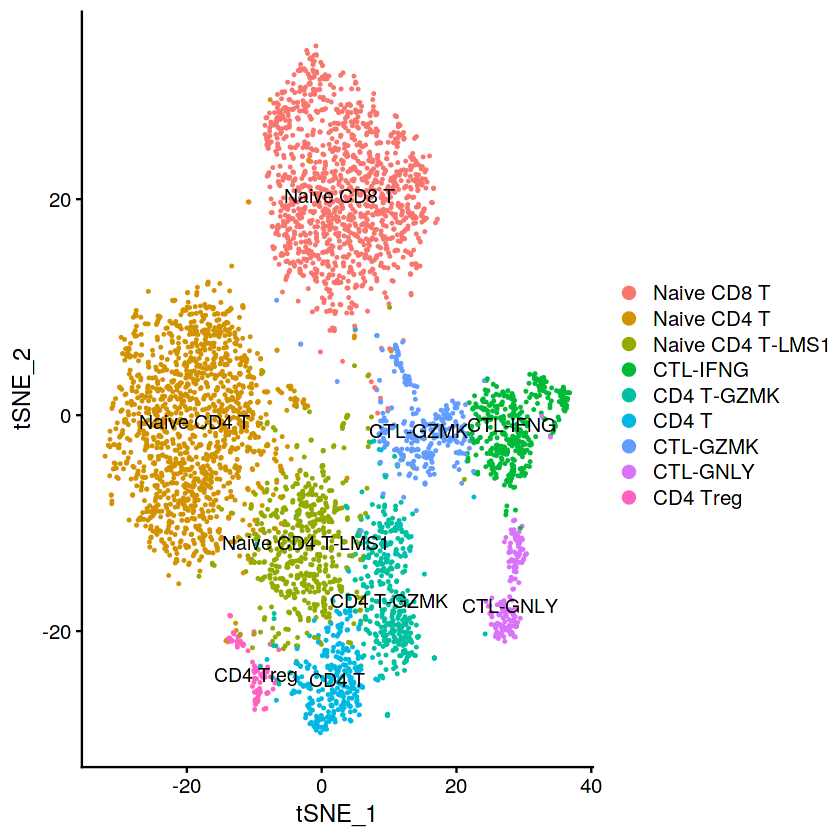

In [11]:
DimPlot(scRNAsub, reduction = 'tsne', label = TRUE)

### change active ident

In [133]:
scRNAsub2=scRNAsub

In [134]:
named=scRNAsub2@meta.data$seurat_clusters
names(named)=rownames(scRNAsub2@meta.data)

scRNAsub2@active.ident=named
levels( scRNAsub2@meta.data$seurat_clusters )

[1] "0"  "1"  "2"  "3"  "4"  "5"  "6"  "7"  "8"  "9"  "10"

In [135]:
head(Idents(scRNAsub2))

AAACCCAGTCGGTGAA AAACCCATCAGACAAA AAACCCATCCATACTT AAACGAACAACTCGAT 
               9                0                4                8 
AAACGAACACCGAATT AAACGAACAGACACCC 
               1                3 
Levels: 0 1 2 3 4 5 6 7 8 9 10

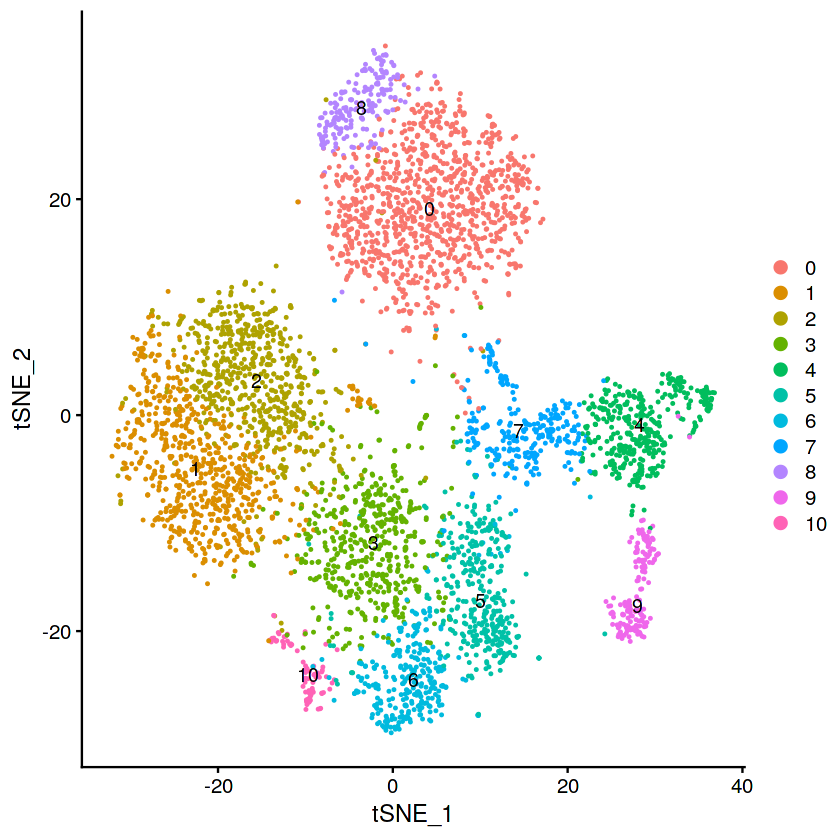

In [136]:
DimPlot(scRNAsub2, reduction = 'tsne', label = TRUE)

## load monocle data

In [137]:
mycds <- readRDS("backup/b1/pbmc_CD4sub_monocle.final.rds")
mycds

CellDataSet (storageMode: environment)
assayData: 22860 features, 2592 samples 
  element names: exprs 
protocolData: none
phenoData
  sampleNames: AAACGAACACCGAATT AAACGAACAGACACCC ... TTTGTTGTCCTAGCTC
    (2592 total)
  varLabels: orig.ident nCount_RNA ... State (11 total)
  varMetadata: labelDescription
featureData
  featureNames: AL627309.1 AL627309.3 ... AC007325.4 (22860 total)
  fvarLabels: gene_short_name use_for_ordering
  fvarMetadata: labelDescription
experimentData: use 'experimentData(object)'
Annotation:  

# begin

主要关注 T sub。

## tSNE feature plot

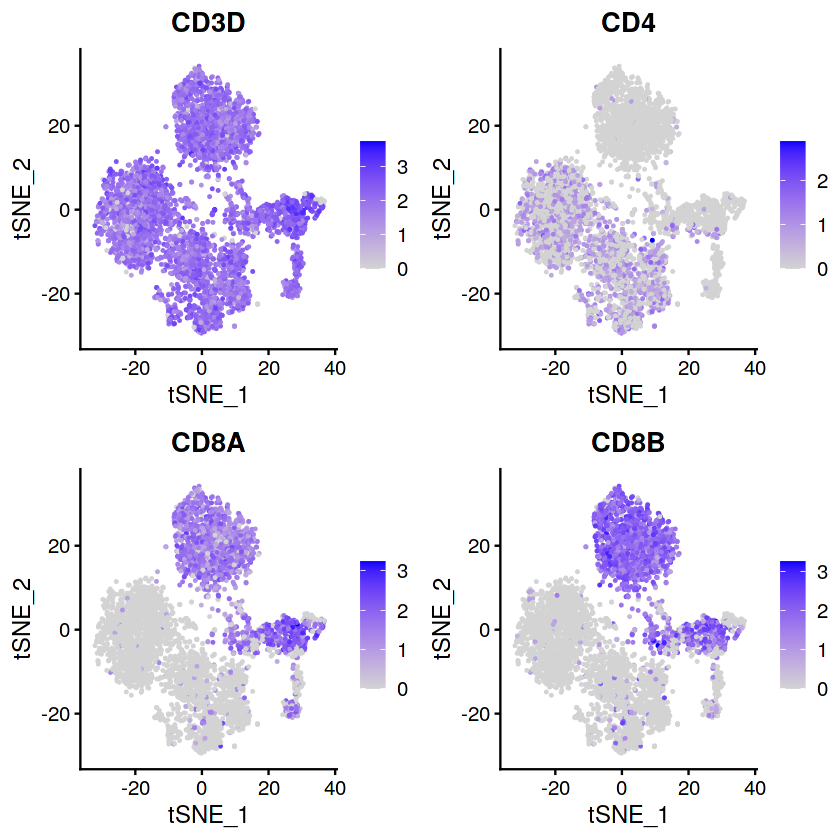

In [138]:
# CD4 or CD8
FeaturePlot(scRNAsub, features = c("CD3D", "CD4","CD8A", "CD8B"), reduction = "tsne")

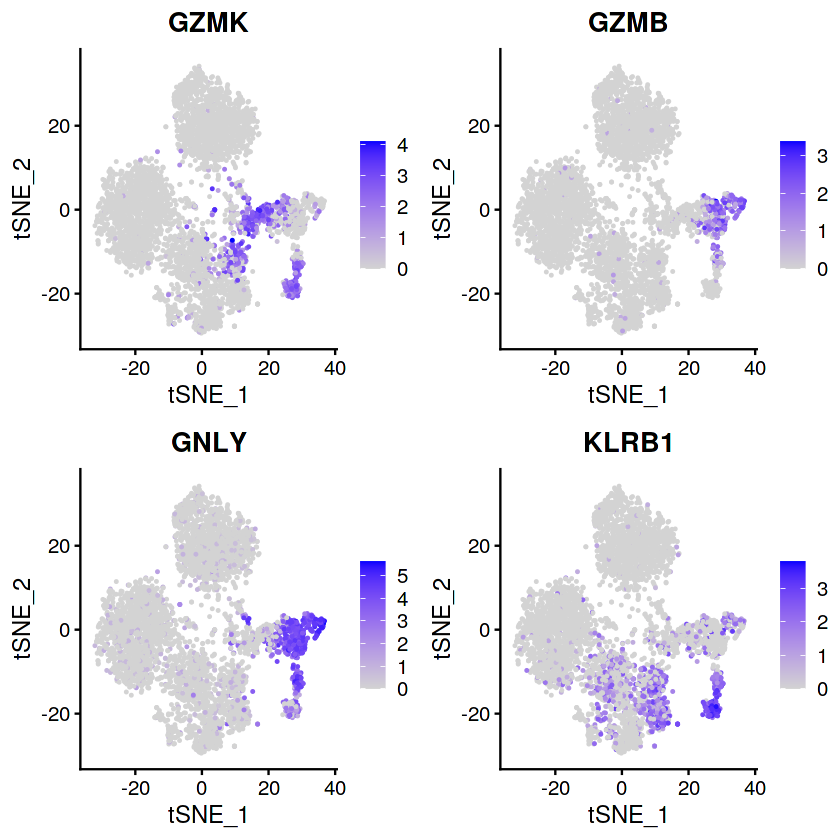

In [20]:
# 细胞毒性
FeaturePlot(scRNAsub, features = c("GZMK", "GZMB", "GNLY", "KLRB1"), reduction = "tsne")

## 比较cluster0和cluster1的差异表达基因

In [24]:
levels(scRNAsub@active.ident)

[1] "Naive CD8 T"      "Naive CD4 T"      "Naive CD4 T-LMS1" "CTL-IFNG"        
[5] "CD4 T-GZMK"       "CD4 T"            "CTL-GZMK"         "CTL-GNLY"        
[9] "CD4 Treg"

### naive CD4 亚类的区别

In [141]:
# 1,2 vs 3
# CD4 的2个亚类的区别
dge.cluster <- FindMarkers(scRNAsub,ident.1 = "Naive CD4 T",ident.2 = 'Naive CD4 T-LMS1')
sig_dge.cluster <- subset(dge.cluster, p_val_adj<0.01 & abs(avg_logFC)>0.7)

dim(sig_dge.cluster)
head(sig_dge.cluster,n=7)

[1] 7 5

p_val         avg_logFC  pct.1 pct.2 p_val_adj    
ITGB1   1.828476e-150 -1.1720460 0.176 0.770 4.179895e-146
S100A11  9.846649e-92 -0.7909415 0.511 0.886  2.250944e-87
S100A4   2.289749e-89 -1.0397226 0.698 0.909  5.234366e-85
CRIP1    3.557779e-83 -0.7664420 0.708 0.954  8.133082e-79
KLRB1    9.739238e-78 -0.8846080 0.047 0.376  2.226390e-73
KLF6     4.184186e-77 -0.8022347 0.531 0.877  9.565049e-73
ANXA1    7.190616e-66 -0.7277065 0.551 0.858  1.643775e-61

- ITGB1 (CD29), 可能是一个 细胞毒性信号
    * https://www.biorxiv.org/content/10.1101/562512v1.full.pdf

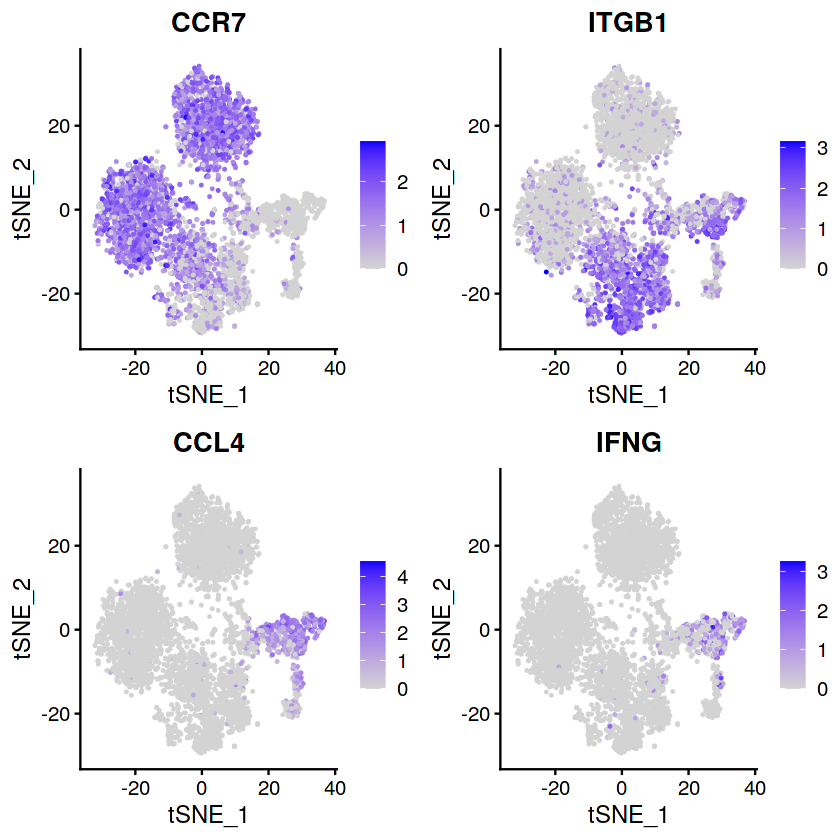

In [23]:
# CCR7 naive marker
# ITGB1 细胞毒性marker?
FeaturePlot(scRNAsub, features = c("CCR7","ITGB1","CCL4", "IFNG"), reduction = "tsne")

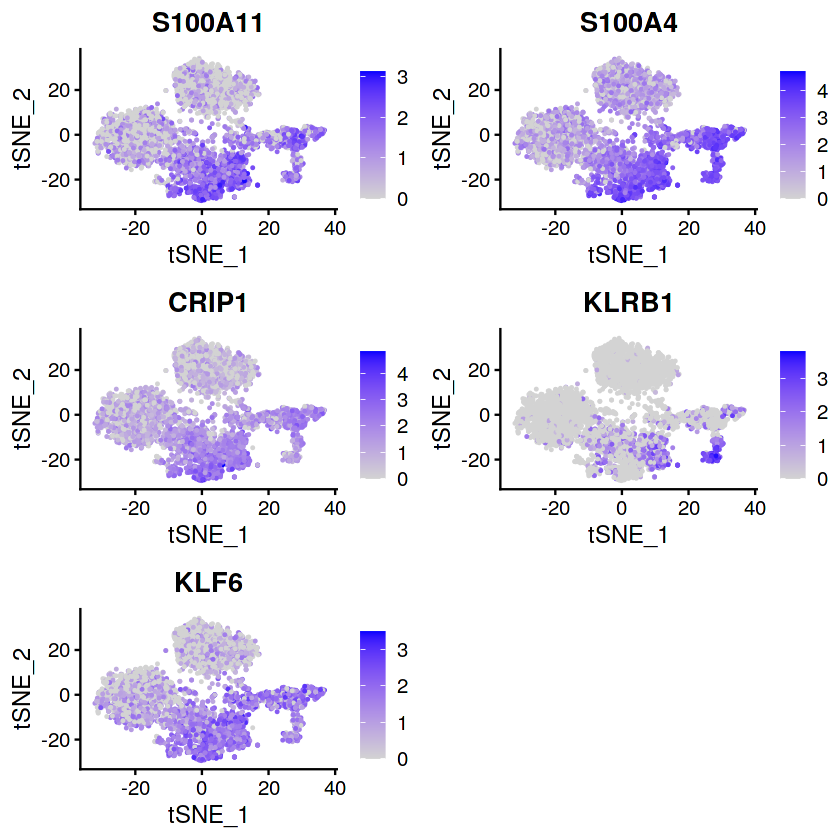

In [43]:
FeaturePlot(scRNAsub, features = c("S100A11","S100A4","CRIP1", "KLRB1","KLF6"), reduction = "tsne")

* c6: KLRB1-

### naive CD4: 1 vs 2

In [27]:
levels(scRNAsub2@active.ident)

[1] "0"  "1"  "2"  "3"  "4"  "5"  "6"  "7"  "8"  "9"  "10"

In [37]:
# 1 vs 2: 真的是没有差异基因：c1 == c2
# naive CD4 T
dge.cluster <- FindMarkers(scRNAsub2, ident.1 = 1, ident.2 = 2)
sig_dge.cluster <- subset(dge.cluster, p_val_adj<0.05 & abs(avg_logFC)>0.4) # 放宽条件才几个

dim(sig_dge.cluster)
head(sig_dge.cluster)

[1] 5 5

p_val        avg_logFC  pct.1 pct.2 p_val_adj   
ACTB  3.767330e-58 -0.4540385 1.000 1.000 8.612117e-54
ETS1  5.646026e-41  0.4628423 0.947 0.759 1.290682e-36
IL7R  1.474085e-35  0.4315195 0.988 0.921 3.369757e-31
NEAT1 9.219592e-28  0.5163731 0.874 0.707 2.107599e-23
BCL2  1.594206e-24  0.4286676 0.636 0.366 3.644356e-20

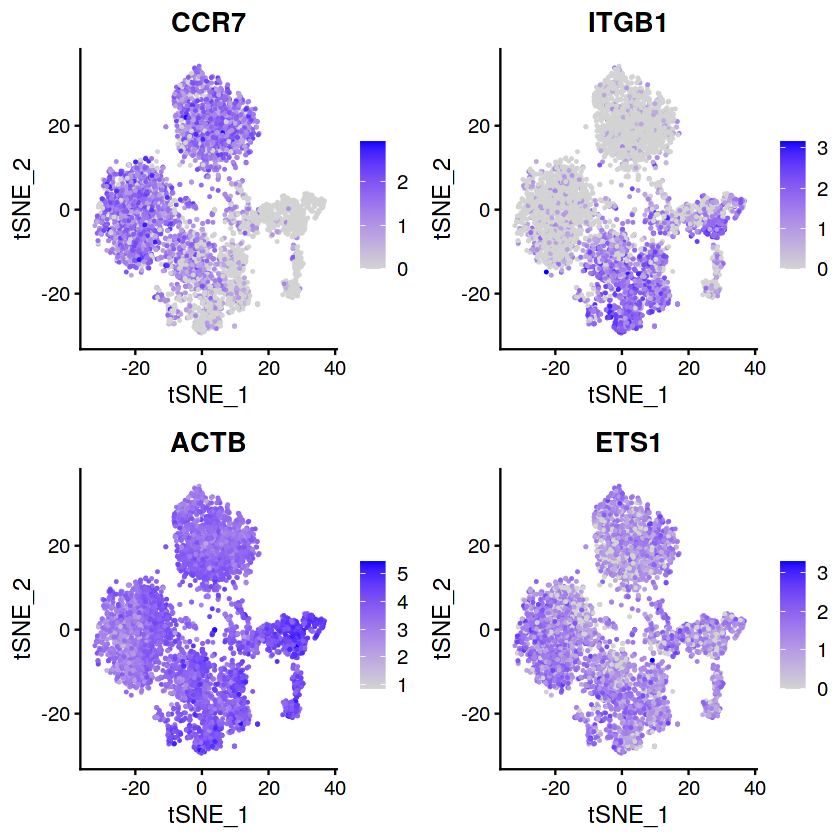

In [41]:
FeaturePlot(scRNAsub2, features = c("CCR7","ITGB1","ACTB", "ETS1"), reduction = "tsne")

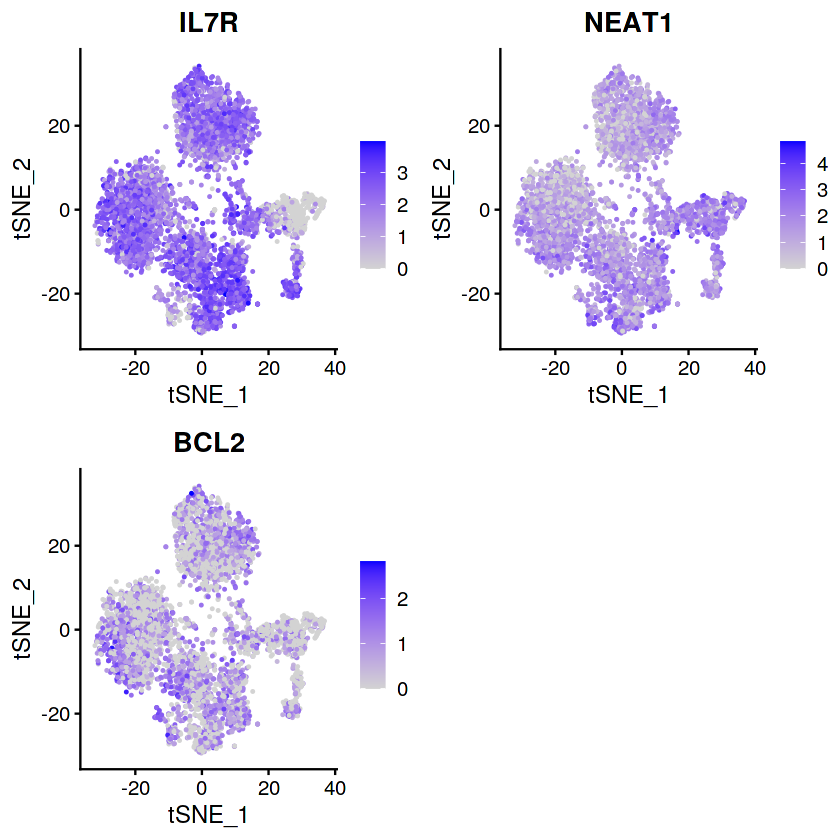

In [42]:
FeaturePlot(scRNAsub2, features = c('IL7R','NEAT1','BCL2'), reduction = "tsne")

* c4: IL7R-

### CD4: 5 vs 6

In [46]:
# 5 vs 6: 
# CD4 T
dge.cluster <- FindMarkers(scRNAsub2, ident.1 = 5, ident.2 = 6)
sig_dge.cluster <- subset(dge.cluster, p_val_adj<0.05 & abs(avg_logFC)>0.6)

dim(sig_dge.cluster)
head(sig_dge.cluster, n=8)

[1] 8 5

p_val        avg_logFC  pct.1 pct.2 p_val_adj   
KLRB1    2.109105e-50  1.3728511 0.752 0.175 4.821414e-46
CCR10    1.008670e-39 -0.7884975 0.017 0.432 2.305820e-35
C1orf162 4.363936e-32 -0.6618187 0.242 0.675 9.975957e-28
LGALS1   7.569400e-31 -1.0656713 0.534 0.822 1.730365e-26
LPAR6    1.225064e-30 -0.6384176 0.350 0.747 2.800495e-26
ITGA4    1.377930e-30  0.6042168 0.716 0.250 3.149947e-26
CCL5     3.162435e-18  1.0855406 0.466 0.168 7.229326e-14
GZMK     1.150748e-17  1.1571695 0.342 0.072 2.630609e-13

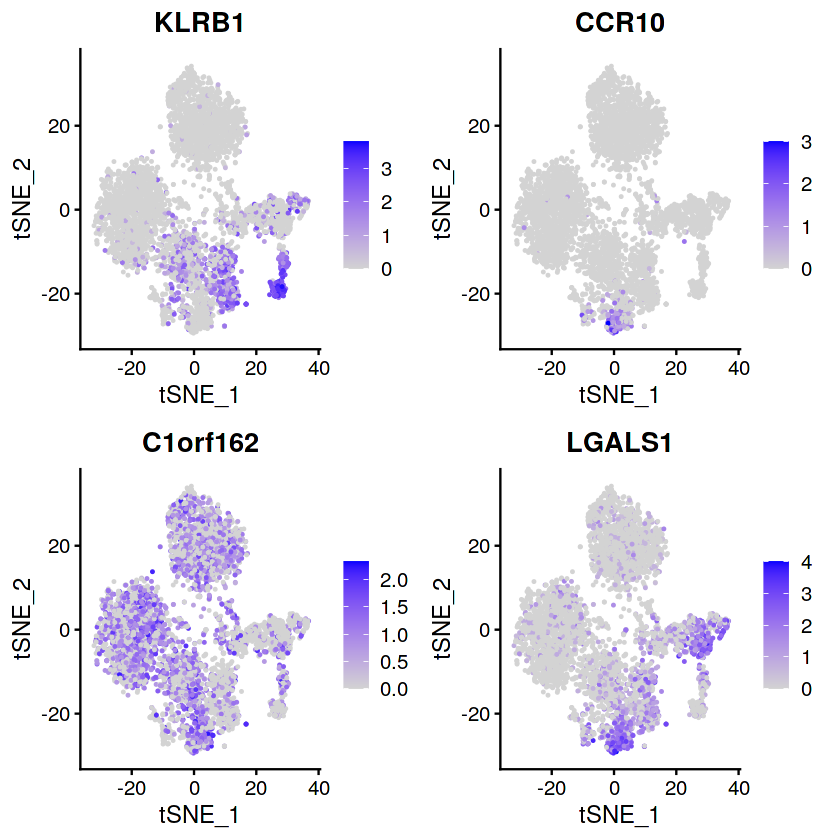

In [47]:
FeaturePlot(scRNAsub2, features = c('KLRB1','CCR10','C1orf162','LGALS1'), reduction = "tsne")

* (lower)c6: 
    - CCR10+ 特异性marker；
    - ITGA4-

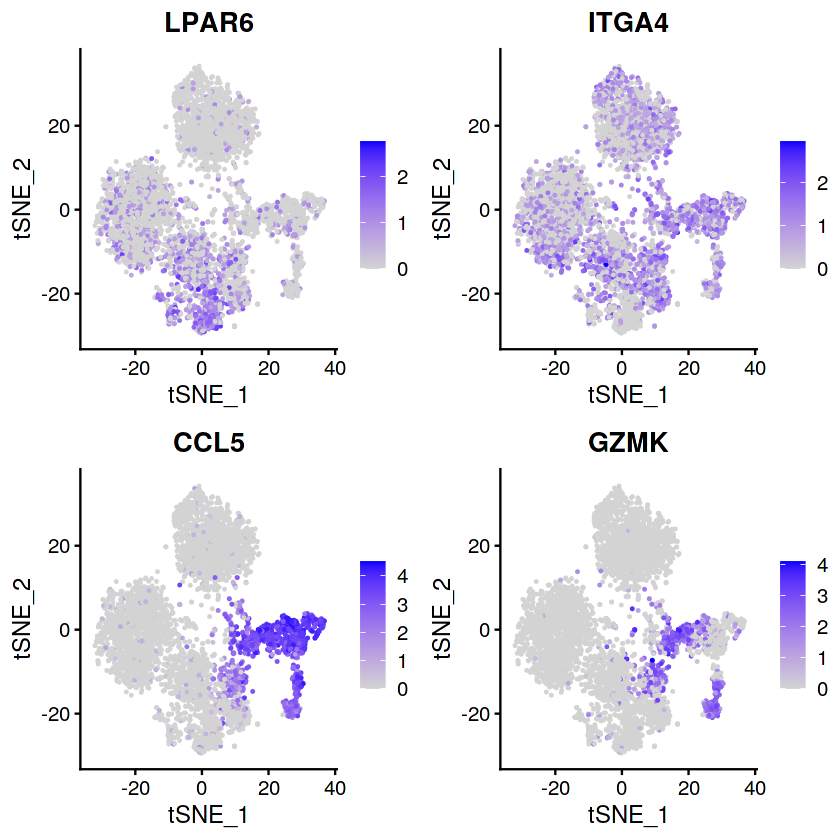

In [48]:
FeaturePlot(scRNAsub2, features = c('LPAR6','ITGA4','CCL5','GZMK'), reduction = "tsne")

### naive CD8: 0 vs 8

In [50]:
# 0 vs 8: 
# naive CD8 T
dge.cluster <- FindMarkers(scRNAsub2, ident.1 = 0, ident.2 = 8)
sig_dge.cluster <- subset(dge.cluster, p_val_adj<0.05 & abs(avg_logFC)>0.6)

dim(sig_dge.cluster)
head(sig_dge.cluster, n=11)

[1] 11  5

p_val        avg_logFC pct.1 pct.2 p_val_adj   
JUN      7.015729e-89 2.0155320 0.983 0.386 1.603796e-84
JUNB     1.287582e-87 1.8447684 0.992 0.630 2.943412e-83
FOS      2.983159e-84 1.8081377 0.966 0.342 6.819501e-80
FOSB     1.740997e-75 1.4030230 0.927 0.201 3.979919e-71
DUSP1    1.560279e-59 1.1468164 0.886 0.277 3.566799e-55
JUND     1.099973e-57 0.8041628 0.995 0.810 2.514538e-53
IER2     2.073182e-34 0.9292348 0.836 0.429 4.739293e-30
TSC22D3  8.896264e-34 0.6442330 0.964 0.777 2.033686e-29
PPP1R15A 1.583479e-30 0.6292761 0.560 0.082 3.619833e-26
TUBA1A   3.737079e-28 0.6748833 0.822 0.440 8.542964e-24
SLC2A3   2.663410e-27 0.7518764 0.607 0.163 6.088554e-23

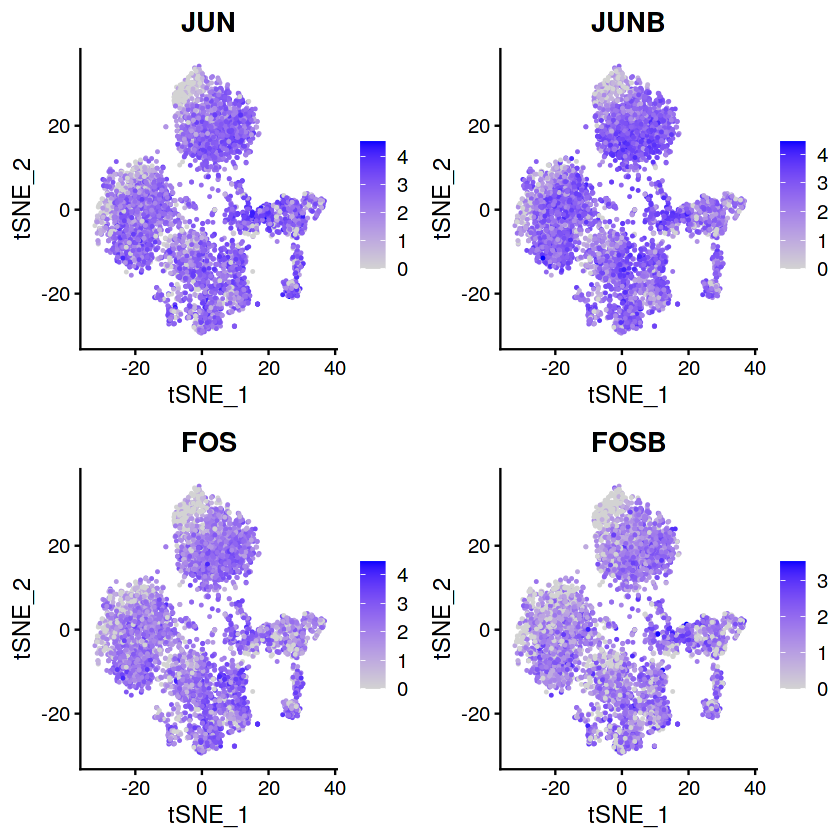

In [51]:
FeaturePlot(scRNAsub2, features = c('JUN','JUNB','FOS','FOSB'), reduction = "tsne")

* c8: JUN-, JUNB-, FOS-, FOSB-

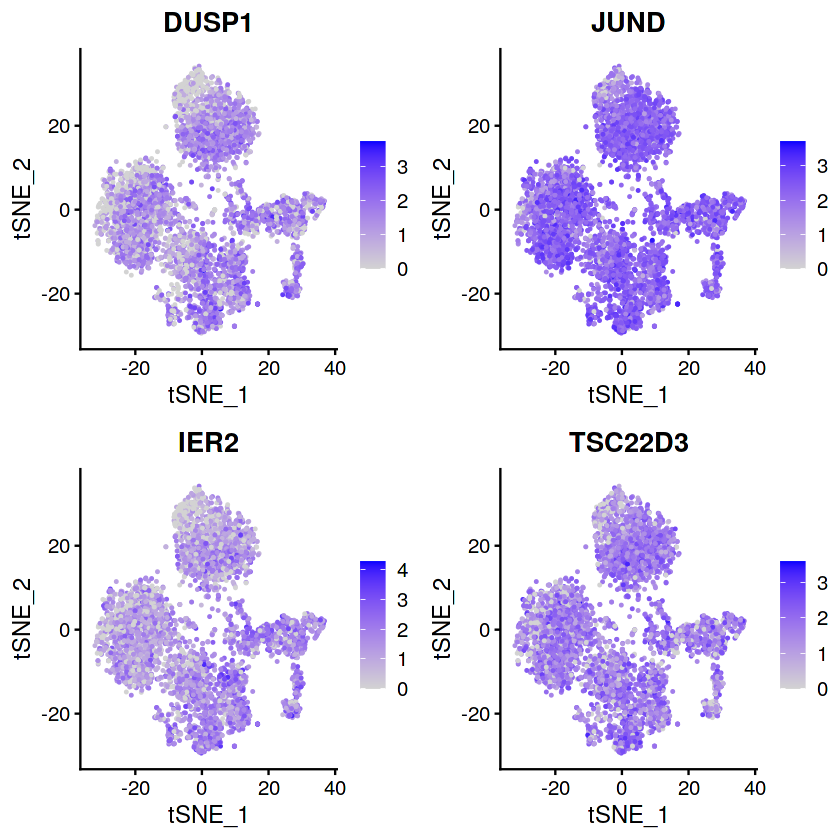

In [52]:
FeaturePlot(scRNAsub2, features = c('DUSP1','JUND','IER2','TSC22D3'), reduction = "tsne")

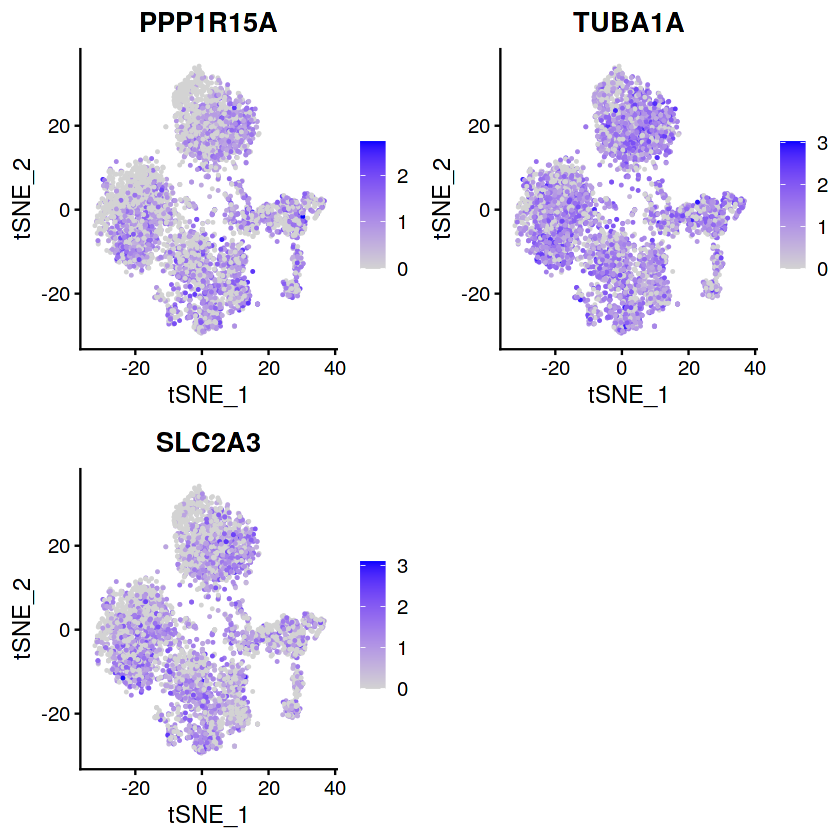

In [55]:
FeaturePlot(scRNAsub2, features = rownames(sig_dge.cluster)[9:11], reduction = "tsne")

In [56]:
rownames(sig_dge.cluster)

[1] "JUN"      "JUNB"     "FOS"      "FOSB"     "DUSP1"    "JUND"    
 [7] "IER2"     "TSC22D3"  "PPP1R15A" "TUBA1A"   "SLC2A3"

### CTL: 4 vs 7

In [58]:
# CTL: 4 vs 7
dge.cluster <- FindMarkers(scRNAsub2, ident.1 = 4, ident.2 = 7)
sig_dge.cluster <- subset(dge.cluster, p_val_adj<0.05 & abs(avg_logFC)>1.2)

dim(sig_dge.cluster)
head(sig_dge.cluster, n=11)

[1] 11  5

p_val        avg_logFC pct.1 pct.2 p_val_adj   
GZMH   6.737815e-98  2.315536 0.979 0.180 1.540264e-93
NKG7   6.123598e-88  1.358251 1.000 0.861 1.399854e-83
GNLY   4.455592e-82  2.300577 0.957 0.248 1.018548e-77
PRF1   2.409315e-74  1.407645 0.965 0.432 5.507695e-70
FGFBP2 6.410512e-73  1.874243 0.848 0.135 1.465443e-68
IL7R   6.765854e-73 -1.701128 0.237 0.880 1.546674e-68
GZMB   1.047433e-66  1.596652 0.749 0.038 2.394432e-62
FCGR3A 1.475385e-65  1.474456 0.784 0.098 3.372730e-61
KLRD1  2.250863e-58  1.376245 0.861 0.297 5.145474e-54
LTB    1.277350e-54 -1.483456 0.443 0.876 2.920023e-50
GZMK   7.487156e-41 -1.494491 0.264 0.722 1.711564e-36

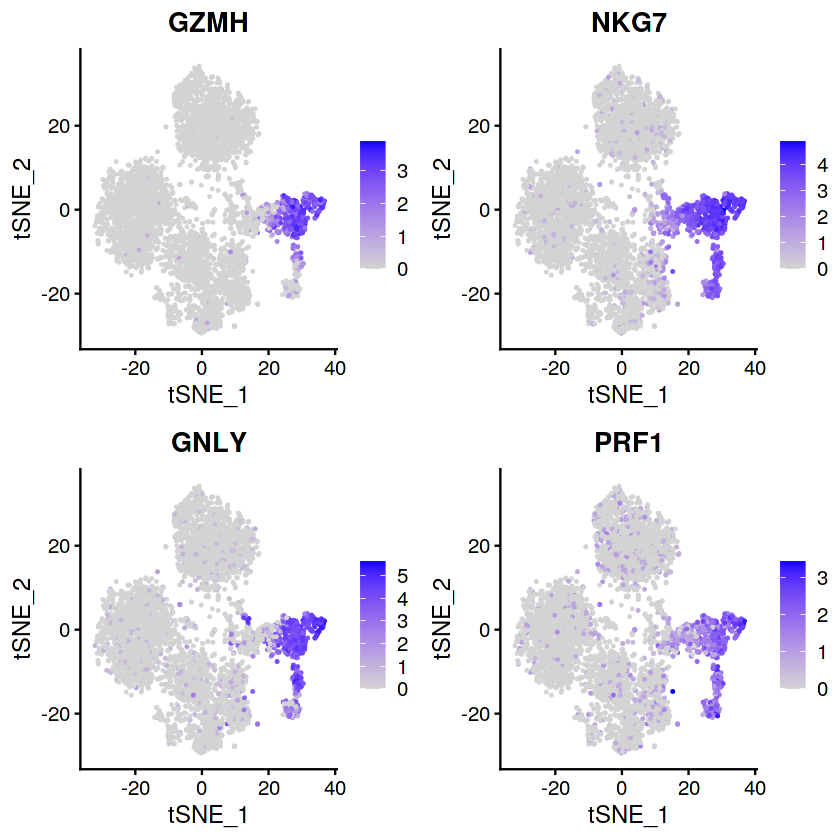

In [59]:
FeaturePlot(scRNAsub2, features = rownames(sig_dge.cluster)[1:4], reduction = "tsne")
# c4(upper): GZMH+(特异), NKG7+, GNLY+, PRF1+(穿孔素)

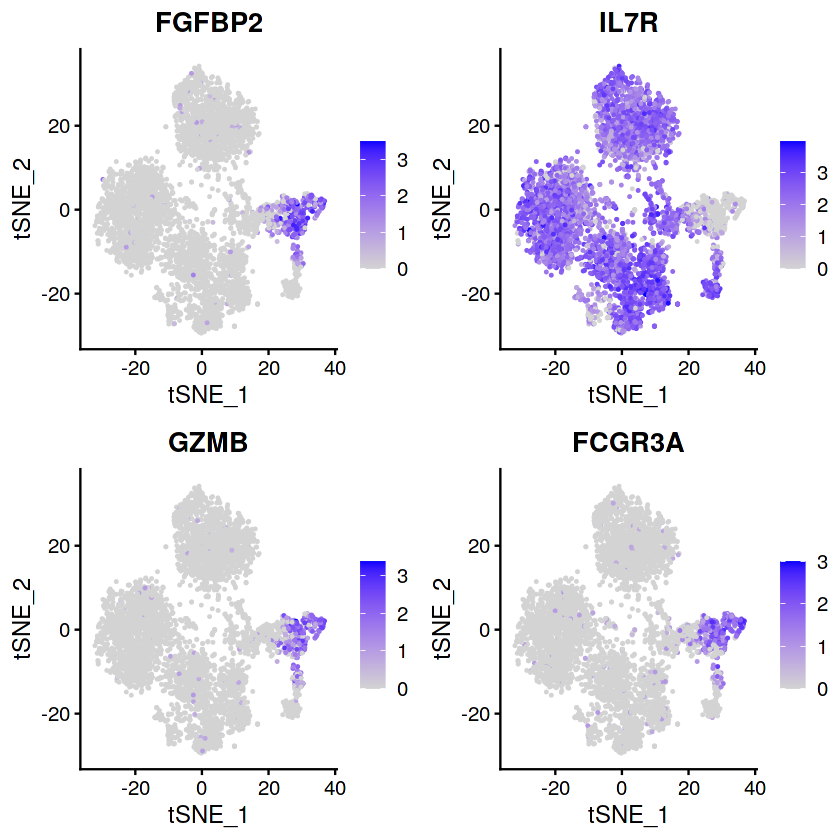

In [60]:
FeaturePlot(scRNAsub2, features = rownames(sig_dge.cluster)[5:8], reduction = "tsne")
# c4(upper): IL7R--(特异);  FGFBP2+, GZMB+, FCGR3A+(特异);
# c7: IL7R+

# FCGR3A (CD16): 
#Transcriptomes reveal a subpopulation of FCGR3A (CD16)-expressing 
# natural killer (NK)-like CD8 T lymphocytes that increase in smokers. 
# Mass cytometry confirms elevated CD16+ CD8 T cells in smokers.


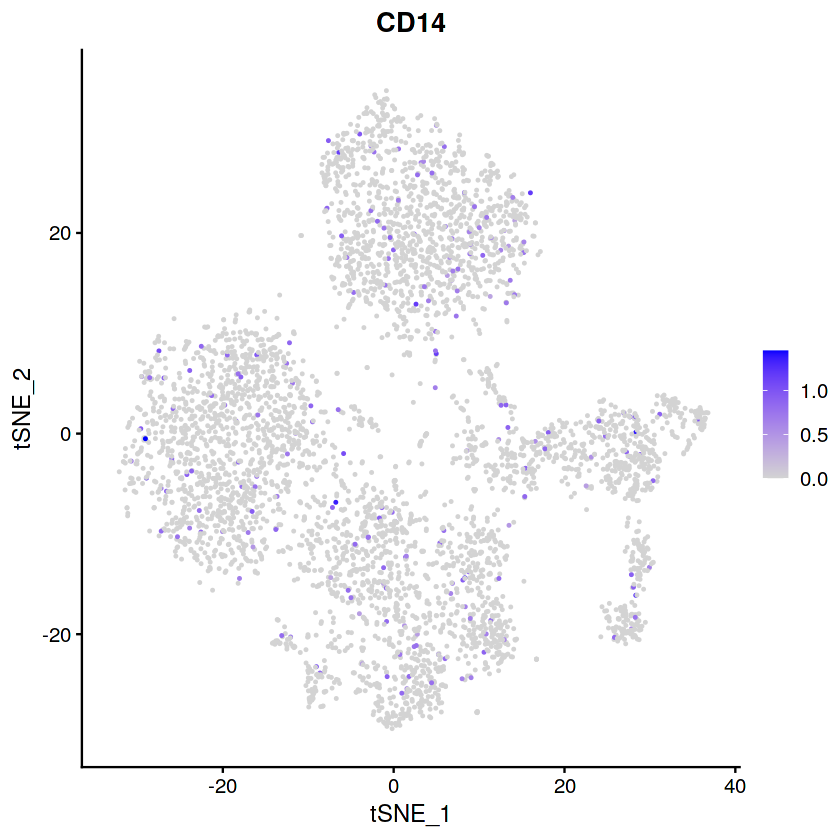

In [64]:
FeaturePlot(scRNAsub2, features = c("CD14"), reduction = "tsne")

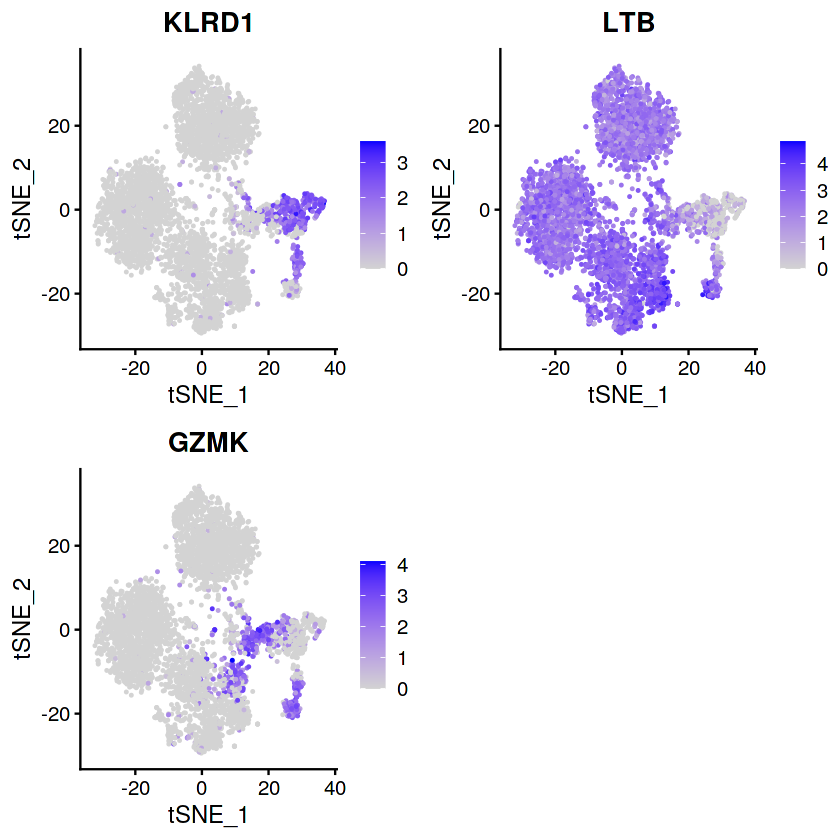

In [61]:
FeaturePlot(scRNAsub2, features = rownames(sig_dge.cluster)[9:11], reduction = "tsne")
# c4: KLRD1+, LTB-; GZMK-;
# c7: GZMK+;

# LTB: Lymphotoxin Beta 淋巴毒素 beta;

### CTL: 4 vs 9

In [65]:
# CTL: 4 vs 9
dge.cluster <- FindMarkers(scRNAsub2, ident.1 = 4, ident.2 = 9)
sig_dge.cluster <- subset(dge.cluster, p_val_adj<0.05 & abs(avg_logFC)>1.2)

dim(sig_dge.cluster)
head(sig_dge.cluster, n=11)

[1] 9 5

p_val        avg_logFC pct.1 pct.2 p_val_adj   
KLRB1  2.964434e-65 -1.904422 0.261 0.934 6.776697e-61
IL7R   5.435782e-65 -1.849050 0.237 0.916 1.242620e-60
GZMH   4.493547e-63  1.853132 0.979 0.325 1.027225e-58
GZMK   5.300715e-50 -1.361557 0.264 0.886 1.211743e-45
LTB    6.383870e-45 -1.890025 0.443 0.892 1.459353e-40
FGFBP2 4.081540e-43  1.530032 0.848 0.229 9.330400e-39
FCGR3A 8.350268e-41  1.319859 0.784 0.193 1.908871e-36
LGALS1 1.330298e-27  1.237313 0.752 0.331 3.041061e-23
CD8B   9.697020e-25  1.232031 0.667 0.265 2.216739e-20

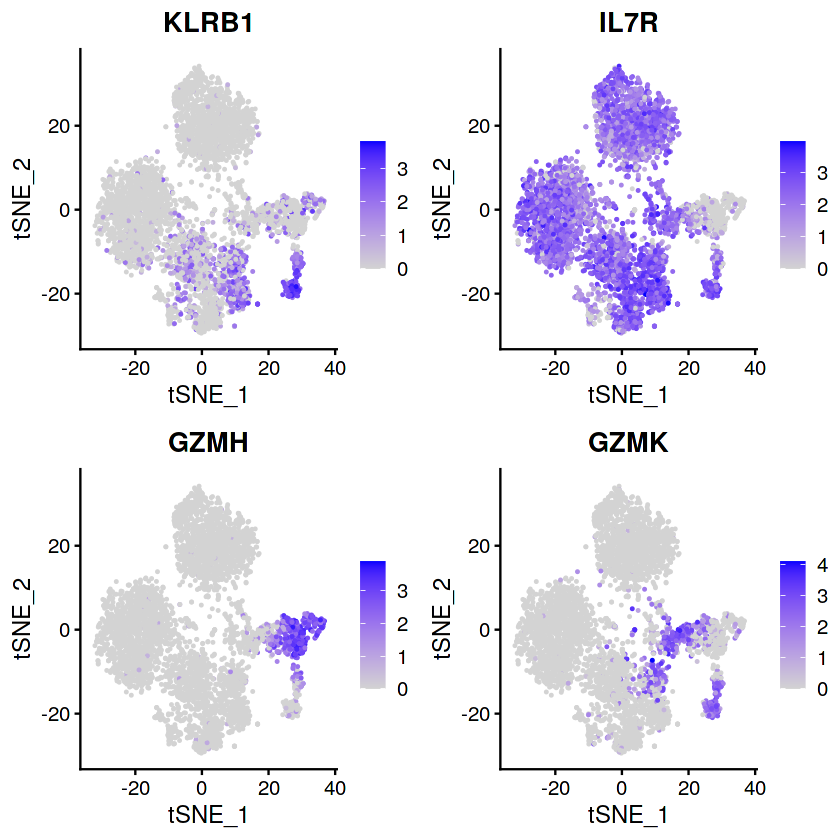

In [66]:
FeaturePlot(scRNAsub2, features = rownames(sig_dge.cluster)[1:4], reduction = "tsne")
# c4: ;GZMH+, 
# c9: KLRB1+, IL7R+, GZMK+;

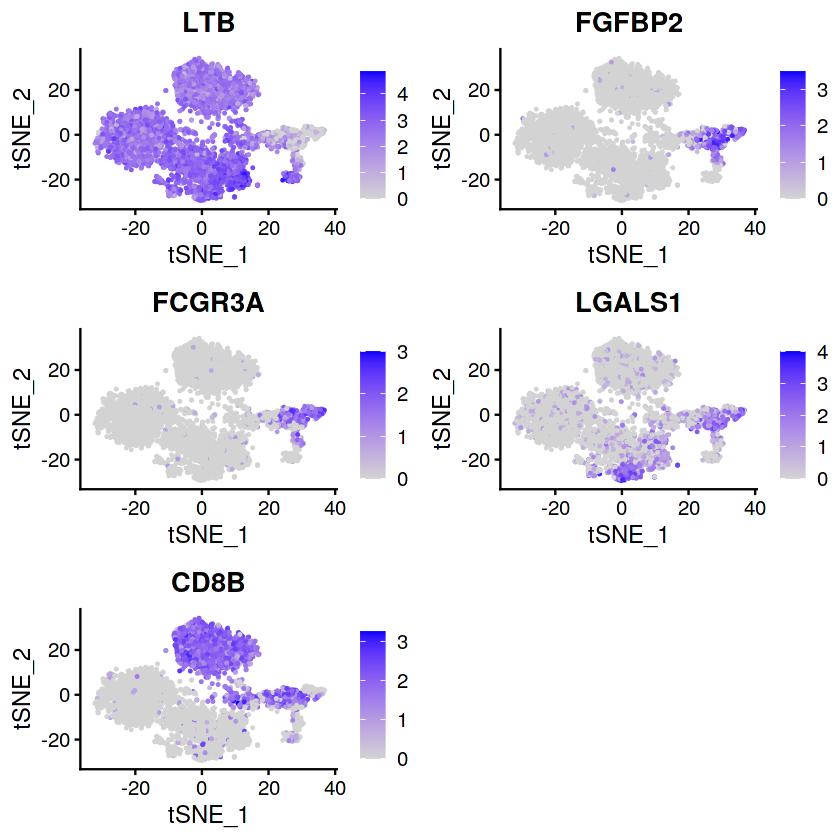

In [67]:
FeaturePlot(scRNAsub2, features = rownames(sig_dge.cluster)[5:9], reduction = "tsne")

### CTL: 7 vs 9

In [70]:
# CTL: 7 vs 9
dge.cluster <- FindMarkers(scRNAsub2, ident.1 = 7, ident.2 = 9)
sig_dge.cluster <- subset(dge.cluster, p_val_adj<0.05 & abs(avg_logFC)>1)

dim(sig_dge.cluster)
head(sig_dge.cluster, n=11)

[1] 7 5

p_val        avg_logFC pct.1 pct.2 p_val_adj   
KLRB1 1.850910e-68 -2.444285 0.124 0.934 4.231179e-64
PRF1  3.481783e-47 -1.187776 0.432 0.958 7.959356e-43
CEBPD 9.568178e-44 -1.081225 0.030 0.639 2.187285e-39
GNLY  1.272836e-36 -1.599638 0.248 0.843 2.909704e-32
TRGC1 4.415555e-30 -1.345335 0.128 0.614 1.009396e-25
CD8B  1.575292e-25  1.082679 0.733 0.265 3.601117e-21
TRDC  2.502889e-16 -1.100955 0.098 0.440 5.721604e-12

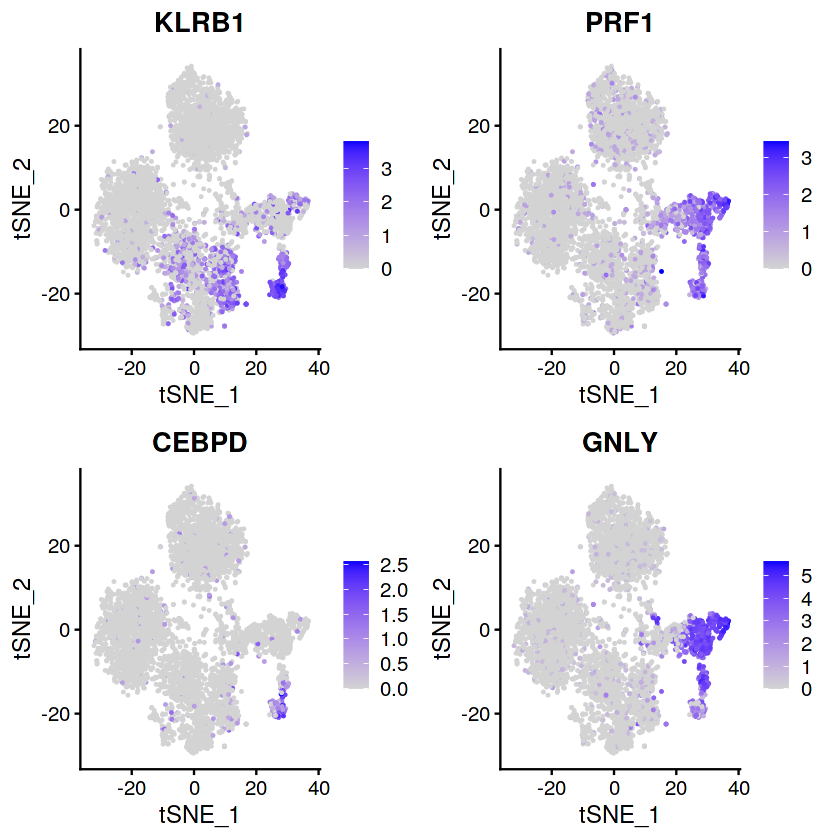

In [72]:
FeaturePlot(scRNAsub2, features = rownames(sig_dge.cluster)[1:4], reduction = "tsne")
# c7: ;
# c9: KLRB1++; GNLY++; TRGC1++(特异); TRDC+; 

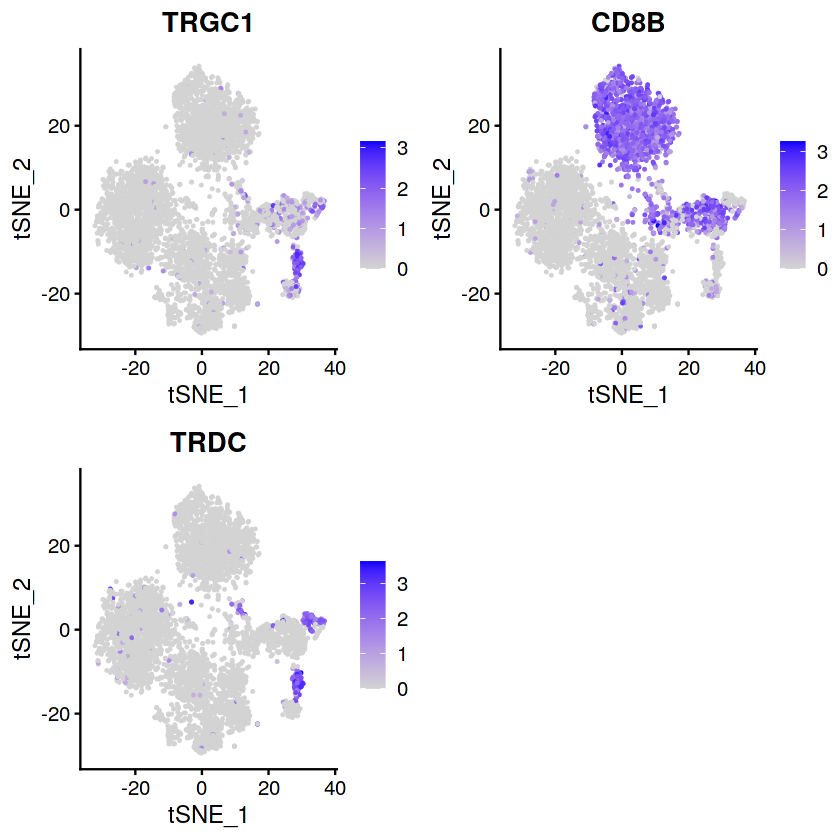

In [73]:
FeaturePlot(scRNAsub2, features = rownames(sig_dge.cluster)[5:7], reduction = "tsne")

### CD4 vs Treg

In [74]:
# CD4 vs Treg: (5,6) vs 10
dge.cluster <- FindMarkers(scRNAsub2, ident.1 = c(5,6), ident.2 = 10)
sig_dge.cluster <- subset(dge.cluster, p_val_adj<0.05 & abs(avg_logFC)>1)

dim(sig_dge.cluster)
head(sig_dge.cluster, n=11)

[1] 7 5

p_val        avg_logFC pct.1 pct.2 p_val_adj   
FOXP3 4.044122e-87 -1.135976 0.021 0.699 9.244863e-83
RTKN2 9.631843e-49 -1.322423 0.102 0.699 2.201839e-44
IL2RA 2.357831e-40 -1.131322 0.137 0.699 5.390002e-36
ANXA1 8.073966e-40  1.585511 0.963 0.253 1.845709e-35
IL7R  5.396673e-32  1.383054 0.951 0.651 1.233679e-27
KLRB1 2.882466e-13  1.314024 0.495 0.060 6.589318e-09
CCL5  1.780015e-06  1.033133 0.333 0.084 4.069114e-02

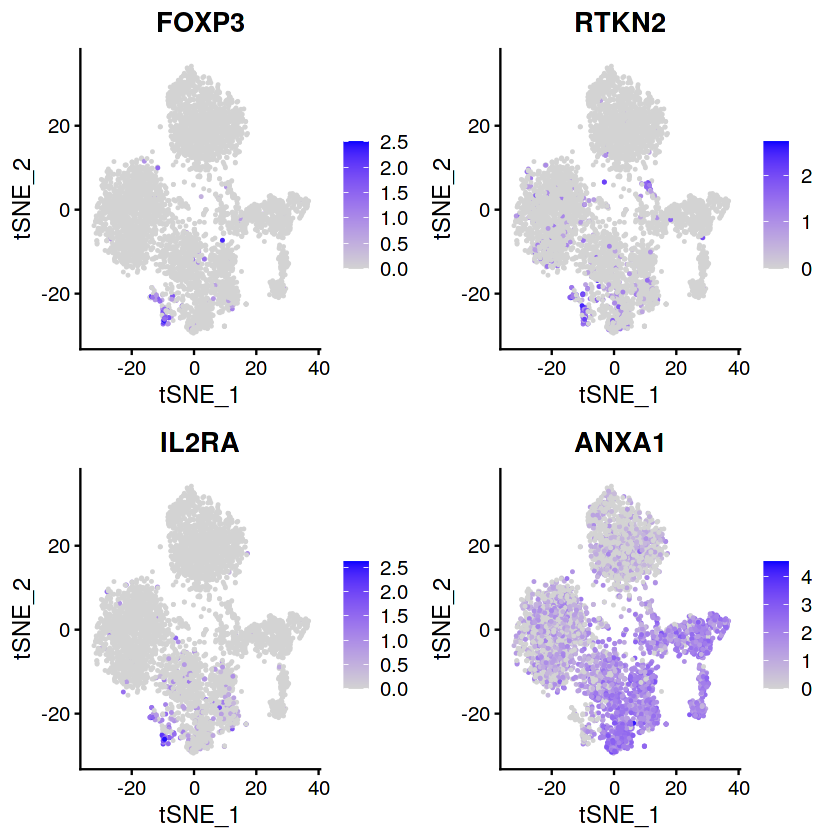

In [75]:
FeaturePlot(scRNAsub2, features = rownames(sig_dge.cluster)[1:4], reduction = "tsne")
# CD4 T: 
# Treg: FOXP3+; RTKN2+; IL2RA+;

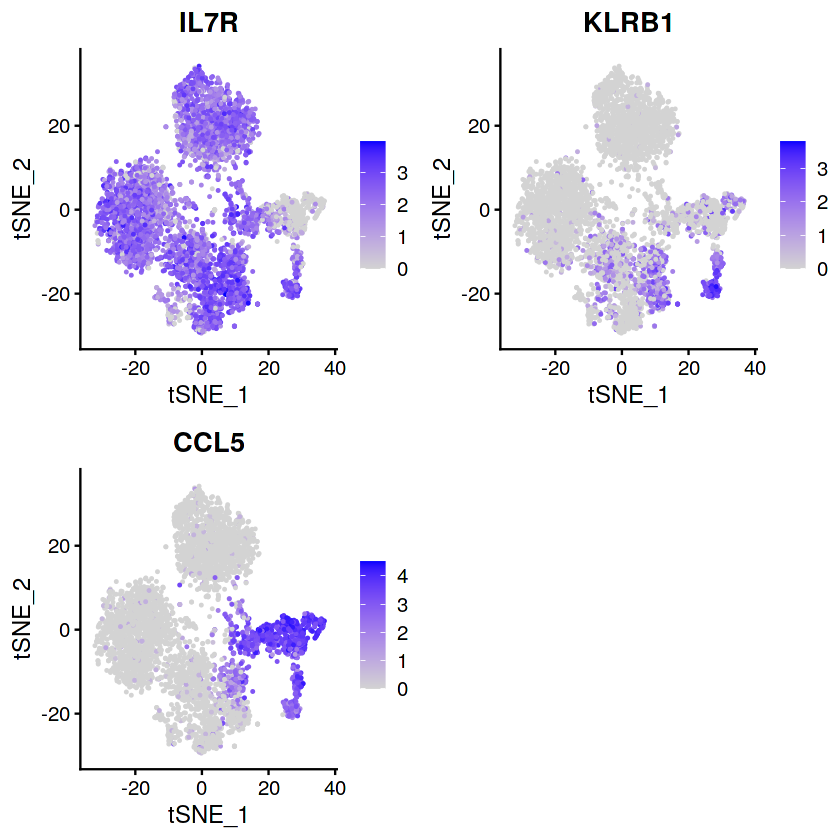

In [76]:
FeaturePlot(scRNAsub2, features = rownames(sig_dge.cluster)[5:7], reduction = "tsne")

### dot plot

使用以上两两比较得到的基因。

In [168]:
# 手工把前面找到的基因放到文件genes..df.txt中
gene.list=(function(){
    rs=read.table("backup/c1/genes.df.txt", header = F)
    rs2=as.character(rs$V1)
    unique( c(rs2, "CD8A", "CCR7", "CD3D","CD3E","CD4") )
})()
length(gene.list)

[1] 51

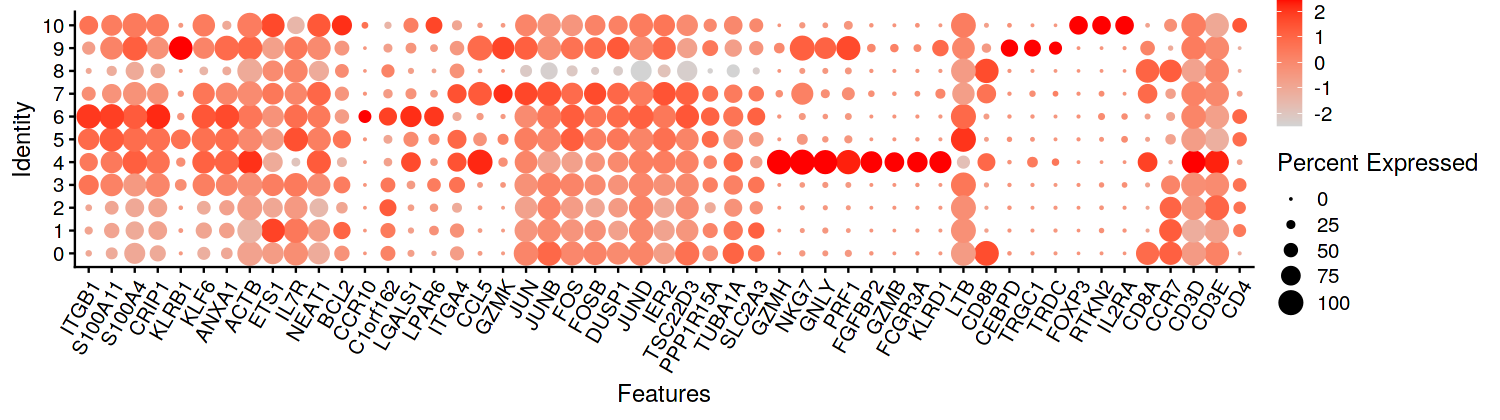

In [170]:
p1=DotPlot(scRNAsub2, features = rev( gene.list ), cols = c("lightgrey", "red") ) +
 theme( axis.text.x = element_text(angle = 60, vjust = 1, hjust = 1) )
#
options(repr.plot.width=12.5, repr.plot.height=3.5)
p1

ggsave(paste0(outputRoot,"01_DotPlot_celltype.pdf"), plot = p1, width = 12.5, height = 3.5)

In [ ]:
p2=DotPlot(scRNAsub, features = rev(gene.list), cols = c("lightgrey", "red") ) +
 theme( axis.text.x = element_text(angle = 60, vjust = 1, hjust = 1) )
#
options(repr.plot.width=13.5, repr.plot.height=3.5)
p2

ggsave(paste0(outputRoot,"01_DotPlot_celltype2.pdf"), plot = p2, width = 13.5, height = 3.5)

## 比较 cell type 的差异

比较naive CD4和CD8的差异表达基因

In [77]:
head(scRNAsub@meta.data)

orig.ident nCount_RNA nFeature_RNA percent.mt RNA_snn_res.0.5
AAACCCAGTCGGTGAA pbmc10k     6590      1867         10.303490  13             
AAACCCATCAGACAAA pbmc10k    11543      2850          6.688036  2              
AAACCCATCCATACTT pbmc10k     6686      2370          9.856416  4              
AAACGAACAACTCGAT pbmc10k     5453      1480         11.424904  2              
AAACGAACACCGAATT pbmc10k    10146      2406          3.617189  1              
AAACGAACAGACACCC pbmc10k     8703      2369          3.171320  3              
                 seurat_clusters cellType     RNA_snn_res.0.9
AAACCCAGTCGGTGAA 9               CD8 T        9              
AAACCCATCAGACAAA 0               CD8 T        0              
AAACCCATCCATACTT 4               CD8 T        4              
AAACGAACAACTCGAT 8               CD8 T        8              
AAACGAACACCGAATT 1               Naive CD4 T  1              
AAACGAACAGACACCC 3               Memory CD4 T 3

In [80]:
levels(scRNAsub@meta.data$cellType)
table(scRNAsub@meta.data$cellType)

[1] "?"            "B"            "CD14+ Mono"   "CD4+ CTL"     "CD8 T"       
 [6] "DC"           "FCGR3A+ Mono" "Memory CD4 T" "Naive CD4 T"  "NK"          
[11] "Platelet"


           ?            B   CD14+ Mono     CD4+ CTL        CD8 T           DC 
           0            0            0            0         2078            0 
FCGR3A+ Mono Memory CD4 T  Naive CD4 T           NK     Platelet 
           0         1236         1327            0            0 

### FindMarkers的参数group.by 是干什么的？

In [87]:
# naive CD4 vs naive CD8
dge.celltype <- FindMarkers(scRNAsub, ident.1 = 'CD4 T', ident.2 = 'CD8 T', group.by = 'cellType')
#dge.celltype <- FindMarkers(scRNAsub, ident.1 = 'B_cell', ident.2 = 'T_cells')
sig_dge.celltype <- subset(dge.celltype, p_val_adj<0.01&abs(avg_logFC)>1)

ERROR: Error in WhichCells.Seurat(object = object, idents = ident.1): Cannot find the following identities in the object: CD4 T


In [79]:
levels(scRNAsub@active.ident)

[1] "Naive CD8 T"      "Naive CD4 T"      "Naive CD4 T-LMS1" "CTL-IFNG"        
[5] "CD4 T-GZMK"       "CD4 T"            "CTL-GZMK"         "CTL-GNLY"        
[9] "CD4 Treg"

In [86]:
dge.celltype <- FindMarkers(scRNAsub, ident.1 = 'Naive CD4 T', ident.2 = 'Naive CD8 T')
sig_dge.celltype <- subset(dge.celltype, p_val_adj<0.01 & abs(avg_logFC)>0.6)

dim(sig_dge.celltype)
head(sig_dge.celltype)

[1] 6 5

p_val         avg_logFC  pct.1 pct.2 p_val_adj    
KLRK1      0.000000e+00 -1.3234099 0.014 0.870  0.000000e+00
CD8A       0.000000e+00 -1.5024835 0.018 0.916  0.000000e+00
CD8B       0.000000e+00 -1.9362292 0.028 0.985  0.000000e+00
LINC02446 2.516802e-303 -1.4036567 0.010 0.734 5.753410e-299
CTSW      2.759968e-237 -0.9185674 0.267 0.872 6.309287e-233
S100B      2.271791e-88 -0.9693892 0.017 0.300  5.193314e-84

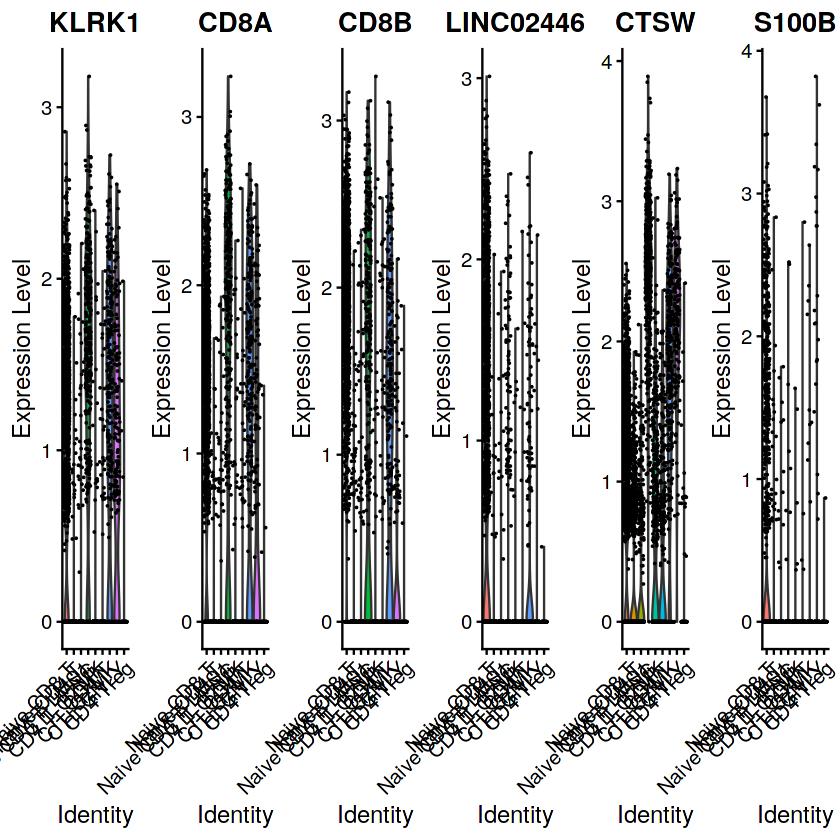

In [121]:
p1=VlnPlot(scRNAsub,
        features = rownames(sig_dge.celltype), 
        pt.size = 0.01, #不需要显示点，可以设置pt.size = 0
        ncol = 6)
p1
ggsave(paste0(outputRoot,"01_VlnPlot_celltype.pdf"), plot = p1, width = 15, height = 5)

## 比较拟时State1和State6的差异表达基因

In [128]:
# 给meta.data 添加一列
p_data <- subset(pData(mycds),select='State') # 只提取 CD4 T cell
scRNAsub3 <- subset(scRNAsub, cells=row.names(p_data))
scRNAsub3 <- AddMetaData(scRNAsub3, p_data, col.name = 'State')
#
head(scRNAsub3@meta.data)

orig.ident nCount_RNA nFeature_RNA percent.mt RNA_snn_res.0.5
AAACGAACACCGAATT pbmc10k    10146      2406         3.617189   1              
AAACGAACAGACACCC pbmc10k     8703      2369         3.171320   3              
AAACGCTAGTATGTAG pbmc10k     5903      1578         2.134508   1              
AAACGCTGTATTGGCT pbmc10k    18850      3628         5.586207   3              
AAACGCTTCGTGGCGT pbmc10k     8595      1974         4.141943   1              
AAAGAACCATTCTCTA pbmc10k     6408      1975         4.697253   3              
                 seurat_clusters cellType     RNA_snn_res.0.9 State
AAACGAACACCGAATT 1               Naive CD4 T  1               1    
AAACGAACAGACACCC 3               Memory CD4 T 3               6    
AAACGCTAGTATGTAG 1               Naive CD4 T  1               11   
AAACGCTGTATTGGCT 3               Memory CD4 T 3               2    
AAACGCTTCGTGGCGT 2               Naive CD4 T  2               11   
AAAGAACCATTCTCTA 3               Memory CD4 T 3               2

In [102]:
head(p_data)

State
AAACGAACACCGAATT 1    
AAACGAACAGACACCC 6    
AAACGCTAGTATGTAG 11   
AAACGCTGTATTGGCT 2    
AAACGCTTCGTGGCGT 11   
AAAGAACCATTCTCTA 2

In [129]:
dge.State <- FindMarkers(scRNAsub3, ident.1 = 1, ident.2 = 6, group.by = 'State')
sig_dge.State <- subset(dge.State, p_val_adj<0.05&abs(avg_logFC)>1)
#
dim(sig_dge.State)
head(sig_dge.State)

[1] 9 5

p_val        avg_logFC pct.1 pct.2 p_val_adj   
AHNAK   5.538198e-93 -1.252005 0.118 0.825 1.266032e-88
ITGB1   1.361681e-87 -1.440674 0.185 0.857 3.112802e-83
ANXA2   5.263154e-86 -1.015740 0.127 0.797 1.203157e-81
S100A4  1.060934e-77 -1.675459 0.686 0.972 2.425296e-73
S100A11 3.630129e-69 -1.072580 0.517 0.940 8.298474e-65
CRIP1   1.859470e-58 -1.089838 0.681 0.949 4.250749e-54

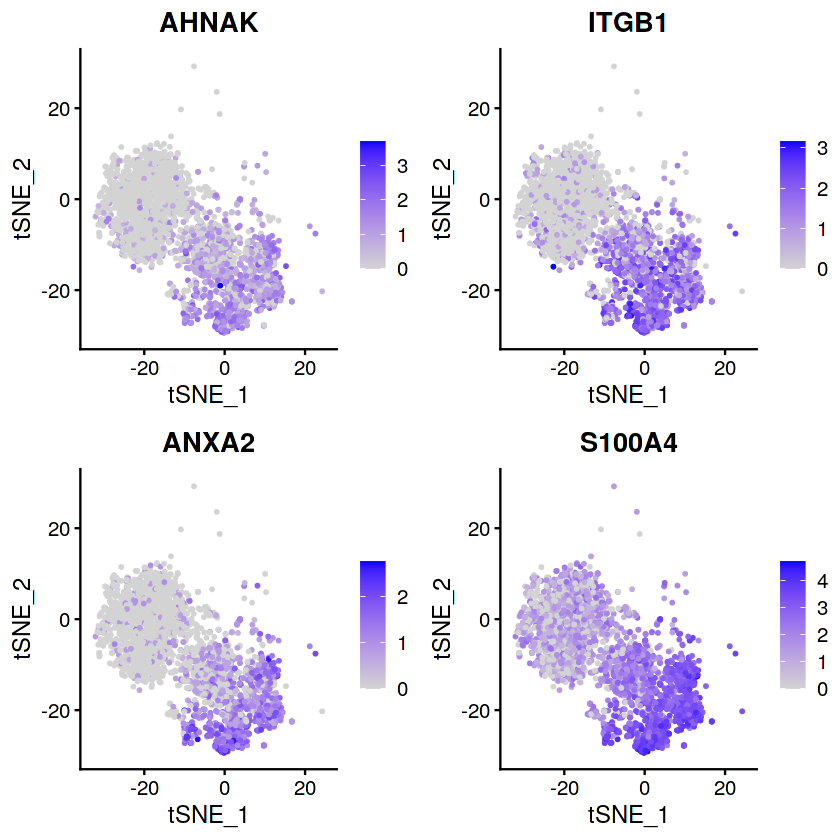

In [130]:
FeaturePlot(scRNAsub3, features = rownames(sig_dge.State)[1:4], reduction = "tsne")

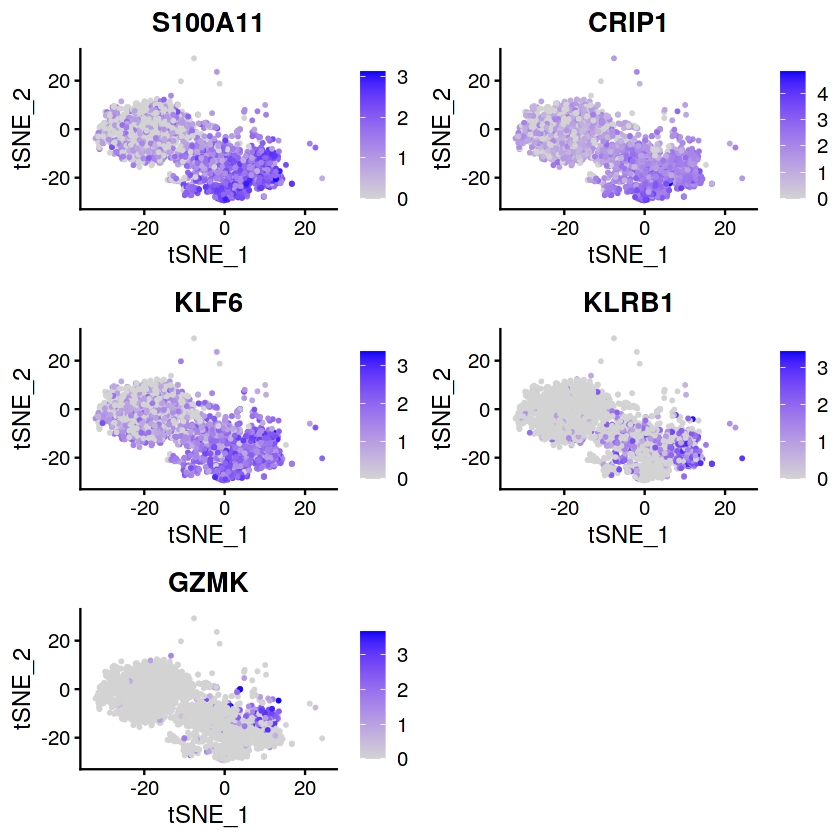

In [131]:
FeaturePlot(scRNAsub3, features = rownames(sig_dge.State)[5:9], reduction = "tsne")

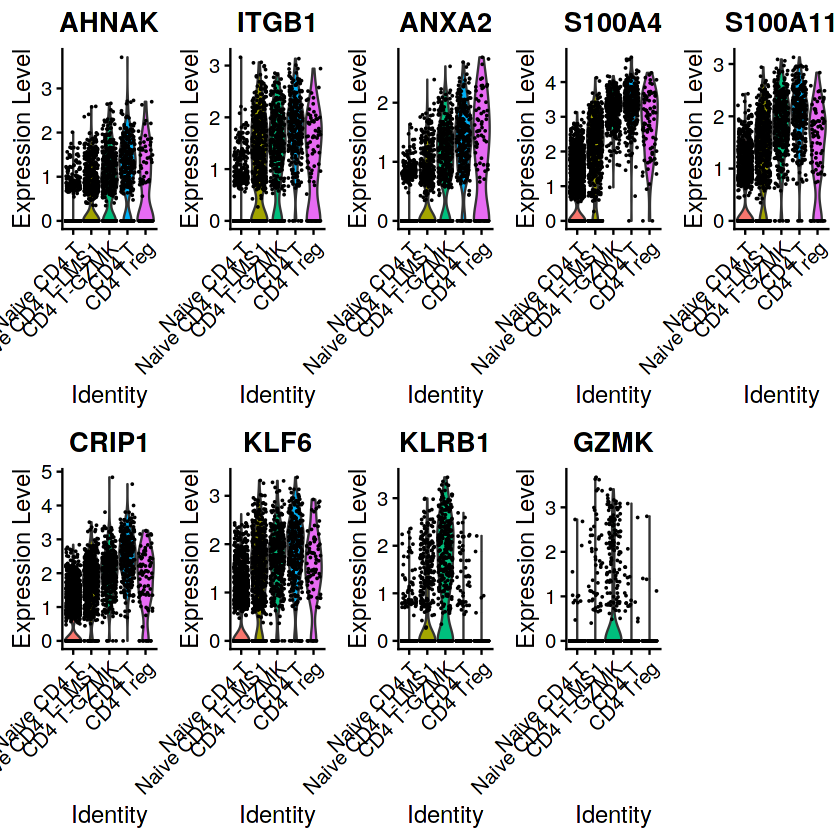

In [132]:
violin=VlnPlot(scRNAsub3,
        features = rownames(sig_dge.State), 
        pt.size = 0.01, #不需要显示点，可以设置pt.size = 0
        ncol = 5) + 
        theme(axis.title.x=element_blank(), axis.text.x=element_blank(), axis.ticks.x=element_blank()) 
violin

ggsave(paste0(outputRoot,"01_VlnPlot_state.pdf"), plot = violin, width = 12, height = 10)

# 差异基因GO富集分析

## 差异基因GO富集分析

In [123]:
ego_ALL <- enrichGO(gene          = row.names(sig_dge.celltype),
                   #universe     = row.names(dge.celltype),
                   OrgDb         = 'org.Hs.eg.db',
                   keyType       = 'SYMBOL',
                   ont           = "ALL",
                   pAdjustMethod = "BH",
                   pvalueCutoff  = 0.01,
                   qvalueCutoff  = 0.05)
ego_all <- data.frame(ego_ALL)
write.csv(ego_all, paste0(outputRoot, '02_enrichGO.csv') ) 

In [124]:
dim(ego_all)
head(ego_all)

[1]  7 10

ONTOLOGY ID         Description                      GeneRatio
GO:0042101 CC       GO:0042101 T cell receptor complex          2/5      
GO:0098802 CC       GO:0098802 plasma membrane receptor complex 2/5      
GO:0042288 MF       GO:0042288 MHC class I protein binding      3/5      
GO:0042287 MF       GO:0042287 MHC protein binding              3/5      
GO:0015026 MF       GO:0015026 coreceptor activity              2/5      
GO:0050786 MF       GO:0050786 RAGE receptor binding            1/5      
           BgRatio   pvalue       p.adjust     qvalue       geneID         
GO:0042101 17/18678  7.784552e-06 1.634756e-04 9.833118e-05 CD8A/CD8B      
GO:0098802 153/18678 6.559342e-04 6.887309e-03 4.142742e-03 CD8A/CD8B      
GO:0042288 16/16969  6.869862e-09 6.869862e-08 7.231434e-09 KLRK1/CD8A/CD8B
GO:0042287 38/16969  1.032883e-07 5.164413e-07 5.436224e-08 KLRK1/CD8A/CD8B
GO:0015026 40/16969  5.393755e-05 1.797918e-04 1.892546e-05 CD8A/CD8B      
GO:0050786 11/16969  3.237386e-03 8.093466e-03 8.519437e-04 S100B          
           Count
GO:0042101 2    
GO:0098802 2    
GO:0042288 3    
GO:0042287 3    
GO:0015026 2    
GO:0050786 1

## 分开: CC, MF, BP

In [125]:
ego_CC <- enrichGO(gene          = row.names(sig_dge.celltype),
                   #universe     = row.names(dge.celltype),
                   OrgDb         = 'org.Hs.eg.db',
                   keyType       = 'SYMBOL',
                   ont           = "CC",
                   pAdjustMethod = "BH",
                   pvalueCutoff  = 0.01,
                   qvalueCutoff  = 0.05)
ego_MF <- enrichGO(gene          = row.names(sig_dge.celltype),
                   #universe     = row.names(dge.celltype),
                   OrgDb         = 'org.Hs.eg.db',
                   keyType       = 'SYMBOL',
                   ont           = "MF",
                   pAdjustMethod = "BH",
                   pvalueCutoff  = 0.01,
                   qvalueCutoff  = 0.05)
ego_BP <- enrichGO(gene          = row.names(sig_dge.celltype),
                   #universe     = row.names(dge.celltype),
                   OrgDb         = 'org.Hs.eg.db',
                   keyType       = 'SYMBOL',
                   ont           = "BP",
                   pAdjustMethod = "BH",
                   pvalueCutoff  = 0.01,
                   qvalueCutoff  = 0.05) 

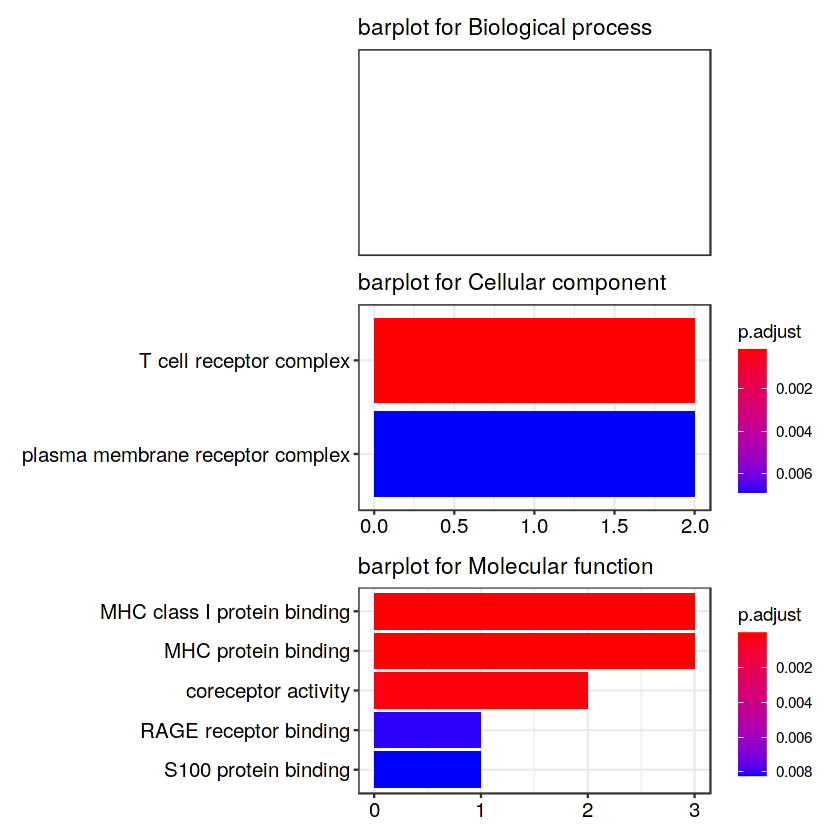

In [126]:
ego_CC@result$Description <- substring(ego_CC@result$Description,1,70)
ego_MF@result$Description <- substring(ego_MF@result$Description,1,70)
ego_BP@result$Description <- substring(ego_BP@result$Description,1,70)
#
p_BP <- barplot(ego_BP,showCategory = 10) + ggtitle("barplot for Biological process")
p_CC <- barplot(ego_CC,showCategory = 10) + ggtitle("barplot for Cellular component")
p_MF <- barplot(ego_MF,showCategory = 10) + ggtitle("barplot for Molecular function")
plotc <- p_BP/p_CC/p_MF
plotc

ggsave( paste0(outputRoot,'02_enrichGO.pdf'), plotc, width = 12,height = 10)

# 差异基因kegg富集分析

'select()' returned 1:1 mapping between keys and columns

wrong orderBy parameter; set to default `orderBy = "x"`



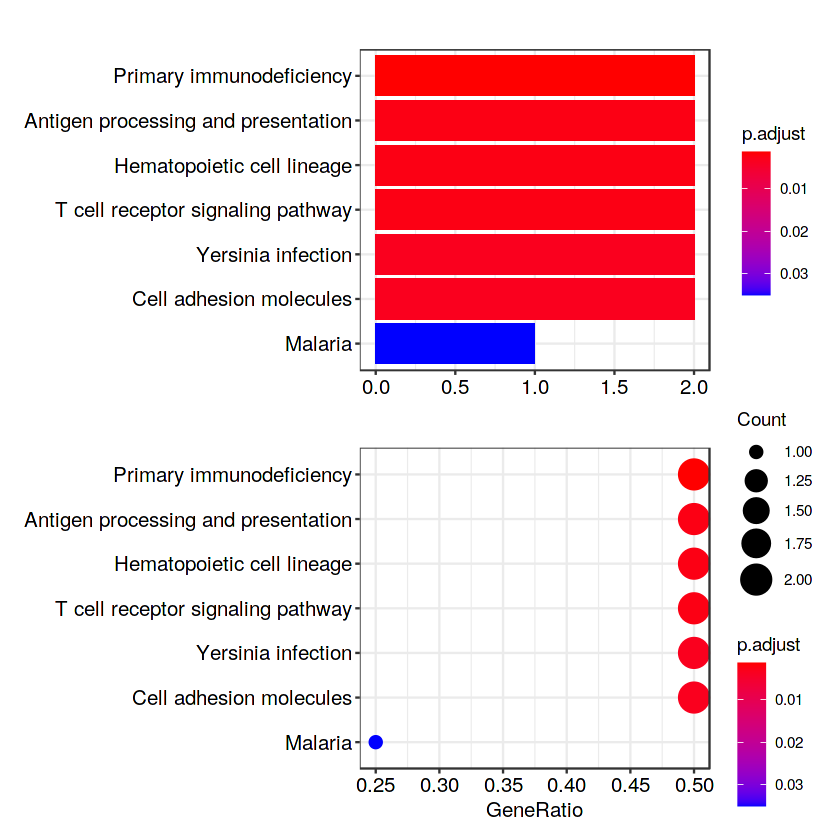

In [127]:
# symbol to gene id
genelist <- bitr(row.names(sig_dge.celltype), 
                 fromType="SYMBOL",
                 toType="ENTREZID", 
                 OrgDb='org.Hs.eg.db')
genelist <- pull(genelist,ENTREZID)

#
ekegg <- enrichKEGG(gene = genelist, organism = 'hsa')
p1 <- barplot(ekegg, showCategory=20)
p2 <- dotplot(ekegg, showCategory=20)
plotc = p1/p2
plotc

ggsave( paste0(outputRoot, "02_enrichKEGG.pdf"), plot = plotc, width = 12, height = 10)